In [114]:
import pandas as pd
import numpy as np

In [115]:
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

In [116]:
trainData.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [154]:
trainData.info

<bound method DataFrame.info of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
4501           0.390114          -0.017978          -0.058127   
5528           0.279617          -0.016752          -0.110378   
4670           0.302739          -0.015068          -0.108936   
3879           0.275796          -0.015395          -0.109908   
7110           0.318569           0.008663          -0.026445   
...                 ...                ...                ...   
5833           0.245796          -0.010874          -0.113862   
1572           0.319506          -0.024392          -0.113904   
6000           0.241397          -0.039097          -0.156477   
3911           0.207709          -0.068412          -0.075489   
1593           0.296366          -0.052498          -0.148686   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
4501          0.295912          0.172048         -0.331759          0.284340   
5528         -0.993524     

In [117]:
trainData['Activity'].unique()      

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [118]:
trainData.groupby('Activity')['Activity'].count()

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Activity, dtype: int64

In [119]:
trainData.shape

(7352, 563)

In [120]:
testData.shape

(2947, 563)

In [121]:
trainData = trainData.sample(frac = 1)

In [122]:
trainData.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
4501,0.390114,-0.017978,-0.058127,0.295912,0.172048,-0.331759,0.284340,0.136622,-0.337688,0.597960,...,-0.841506,-0.669702,-0.972522,0.934061,-0.634665,-0.786318,0.217599,-0.072152,22,WALKING_DOWNSTAIRS
5528,0.279617,-0.016752,-0.110378,-0.993524,-0.997042,-0.985283,-0.994233,-0.996626,-0.986713,-0.932001,...,-0.841454,0.008945,-0.332410,-0.142390,-0.084224,-0.083361,-0.321632,-0.407547,26,SITTING
4670,0.302739,-0.015068,-0.108936,0.218408,0.336839,-0.362640,0.147887,0.323047,-0.398145,0.406939,...,-0.942762,-0.723338,-0.810413,0.910742,0.347937,-0.766983,0.255476,0.053083,22,WALKING_DOWNSTAIRS
3879,0.275796,-0.015395,-0.109908,-0.924026,-0.963166,-0.988132,-0.920932,-0.959056,-0.989636,-0.888054,...,-0.592976,-0.225784,-0.084965,-0.052586,0.473338,0.904678,-0.438552,-0.504146,19,LAYING
7110,0.318569,0.008663,-0.026445,-0.197354,-0.330494,-0.313660,-0.276324,-0.394704,-0.271225,0.179081,...,-0.877276,-0.099083,0.459000,0.966076,-0.509560,-0.841424,0.203719,0.048607,30,WALKING_DOWNSTAIRS


In [123]:
# seperating labels from features

X_train=trainData.iloc[:,:-2]
y_train=trainData.iloc[:,-1]

X_test=testData.iloc[:,:-2]
y_test=testData.iloc[:,-1]

In [124]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
4501,0.390114,-0.017978,-0.058127,0.295912,0.172048,-0.331759,0.284340,0.136622,-0.337688,0.597960,...,0.295563,-0.583305,-0.841506,-0.669702,-0.972522,0.934061,-0.634665,-0.786318,0.217599,-0.072152
5528,0.279617,-0.016752,-0.110378,-0.993524,-0.997042,-0.985283,-0.994233,-0.996626,-0.986713,-0.932001,...,0.579819,-0.534801,-0.841454,0.008945,-0.332410,-0.142390,-0.084224,-0.083361,-0.321632,-0.407547
4670,0.302739,-0.015068,-0.108936,0.218408,0.336839,-0.362640,0.147887,0.323047,-0.398145,0.406939,...,0.112170,-0.695813,-0.942762,-0.723338,-0.810413,0.910742,0.347937,-0.766983,0.255476,0.053083
3879,0.275796,-0.015395,-0.109908,-0.924026,-0.963166,-0.988132,-0.920932,-0.959056,-0.989636,-0.888054,...,0.266477,-0.292309,-0.592976,-0.225784,-0.084965,-0.052586,0.473338,0.904678,-0.438552,-0.504146
7110,0.318569,0.008663,-0.026445,-0.197354,-0.330494,-0.313660,-0.276324,-0.394704,-0.271225,0.179081,...,0.076747,-0.590550,-0.877276,-0.099083,0.459000,0.966076,-0.509560,-0.841424,0.203719,0.048607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5833,0.245796,-0.010874,-0.113862,-0.111226,-0.057144,-0.419406,-0.219669,-0.055290,-0.429425,0.014885,...,-0.041401,-0.325520,-0.726510,0.796173,-0.211531,-0.978700,0.107133,-0.760737,0.263353,0.024609
1572,0.319506,-0.024392,-0.113904,-0.176410,0.097695,0.144280,-0.186238,0.039065,0.145734,0.099995,...,-0.060290,-0.001988,-0.377786,-0.801009,-0.104190,-0.011877,-0.576990,-0.832071,0.214243,0.017523
6000,0.241397,-0.039097,-0.156477,-0.392338,-0.150590,-0.339848,-0.428254,-0.155930,-0.352302,-0.163517,...,0.203140,0.306771,0.123316,0.172335,0.957737,-0.406822,-0.406713,-0.863778,0.190043,0.039474
3911,0.207709,-0.068412,-0.075489,0.021890,0.247710,-0.006251,-0.097746,0.241090,-0.055076,0.527301,...,0.126300,-0.236649,-0.577794,0.247427,-0.318260,-0.888701,-0.750776,-0.768163,0.201339,0.145143


In [125]:
y_train

4501    WALKING_DOWNSTAIRS
5528               SITTING
4670    WALKING_DOWNSTAIRS
3879                LAYING
7110    WALKING_DOWNSTAIRS
               ...        
5833      WALKING_UPSTAIRS
1572               WALKING
6000               WALKING
3911               WALKING
1593    WALKING_DOWNSTAIRS
Name: Activity, Length: 7352, dtype: object

In [126]:
X_train.shape

(7352, 561)

In [127]:
# label encoding y_train and y_test for classification

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values

In [128]:
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values

In [129]:
y_train

array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

In [130]:
y_test


array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [131]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [146]:
# model creation

model=Sequential()

model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax'))

In [147]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 32)                17984     
_________________________________________________________________
dense_42 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_44 (Dense)             (None, 6)                 774       
Total params: 39,494
Trainable params: 39,494
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [149]:
history=model.fit(X_train,y_train,batch_size=256,epochs=20,validation_data=(X_test,y_test))

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 1s 92us/step - loss: 1.4714 - accuracy: 0.3520 - val_loss: 1.0752 - val_accuracy: 0.3838
Epoch 2/20
7352/7352 [==============================] - 0s 33us/step - loss: 0.9244 - accuracy: 0.5369 - val_loss: 0.8062 - val_accuracy: 0.6081
Epoch 3/20
7352/7352 [==============================] - 0s 34us/step - loss: 0.6481 - accuracy: 0.6756 - val_loss: 0.6595 - val_accuracy: 0.6603
Epoch 4/20
7352/7352 [==============================] - 0s 32us/step - loss: 0.5234 - accuracy: 0.7628 - val_loss: 0.5124 - val_accuracy: 0.7428
Epoch 5/20
7352/7352 [==============================] - 0s 32us/step - loss: 0.4137 - accuracy: 0.8323 - val_loss: 0.4142 - val_accuracy: 0.8527
Epoch 6/20
7352/7352 [==============================] - 0s 32us/step - loss: 0.3011 - accuracy: 0.8909 - val_loss: 0.4048 - val_accuracy: 0.8337
Epoch 7/20
7352/7352 [==============================] - 0s 34us/step - loss: 0.202

In [150]:
import matplotlib.pyplot as plt

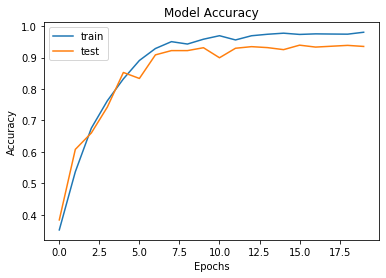

In [151]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

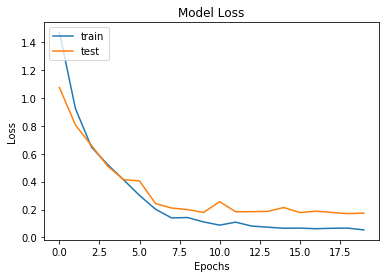

In [152]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()